1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

We can find out that there are 2 possible candidates for our global minima

FIRST CANDIDATE
      fun: -1.0316284534898557
 hess_inv: array([[ 0.12941905, -0.00790844],
       [-0.00790844,  0.06166136]])
      jac: array([ 0.00000000e+00, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.08984201, -0.71265645])

SECOND CANDIDATE
      fun: -1.031628453489866
 hess_inv: array([[ 0.12941902, -0.0079083 ],
       [-0.0079083 ,  0.06166136]])
      jac: array([0.00000000e+00, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-0.08984202,  0.71265644])

By looking at the plots we can conclude that the second candidate shows the global minima.

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization ter

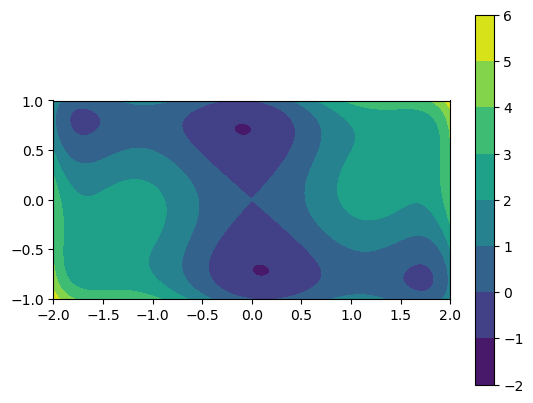

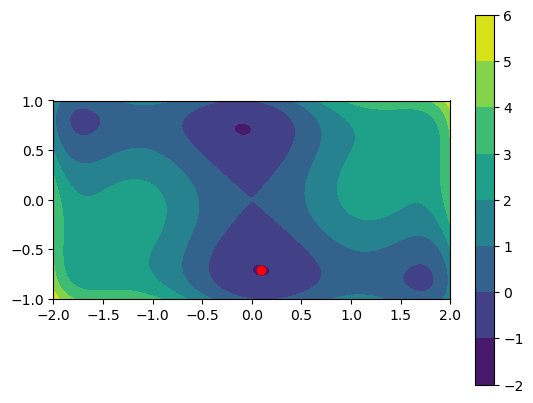

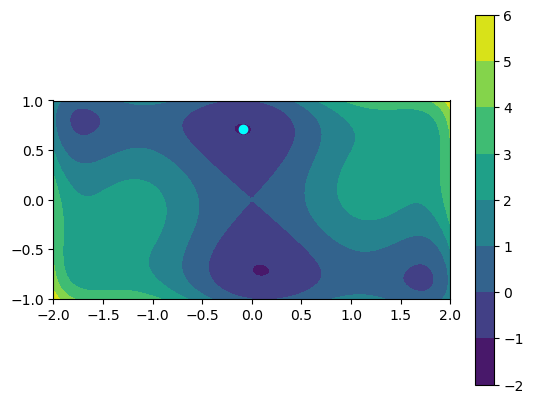

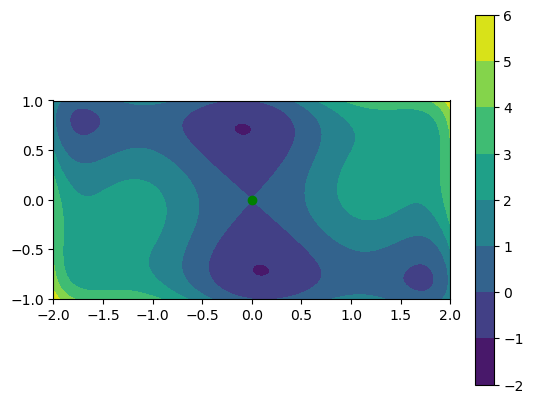

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pylab import imshow

def f(x):
    return(4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

x = np. linspace(-2, 2, 100)
y = np. linspace(-1,1,100)

x_a ,y_a = np.meshgrid(x, y)
z = f([x_a, y_a])

h = plt. contourf(x, y, z)
plt.axis('scaled')
plt.colorbar()
plt.imshow(z)
print("We can find out that there are 2 possible candidates for our global minima")

#MINIMO 1
igl = np.array((0,-0.5))
solutionl = optimize.minimize(f, igl)
plt. figure()
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.colorbar()
plt.imshow(z)
plt.scatter(solutionl.x[0], solutionl.x[1], color = 'r')
print("")
print("FIRST CANDIDATE")
print (solutionl)

#MINIMO 2
ig2 = np.array((0, 0.5))
solution2 = optimize.minimize(f,ig2)
plt.figure()
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.colorbar()
plt.imshow(z)
plt.scatter(solution2.x[0], solution2.x[1], color = 'cyan')
print("")
print("SECOND CANDIDATE")
print(solution2)

print("")
print("By looking at the plots we can conclude that the second candidate shows the global minima.")

ig3 =np.array((0,0))
solution3 = optimize.minimize(f,ig3)
plt.figure()
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.colorbar()
plt.imshow(z)
plt.scatter(solution3.x[0], solution3.x[1], color = 'green')
print("")
print(solution3)

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

<IPython.core.display.Javascript object>


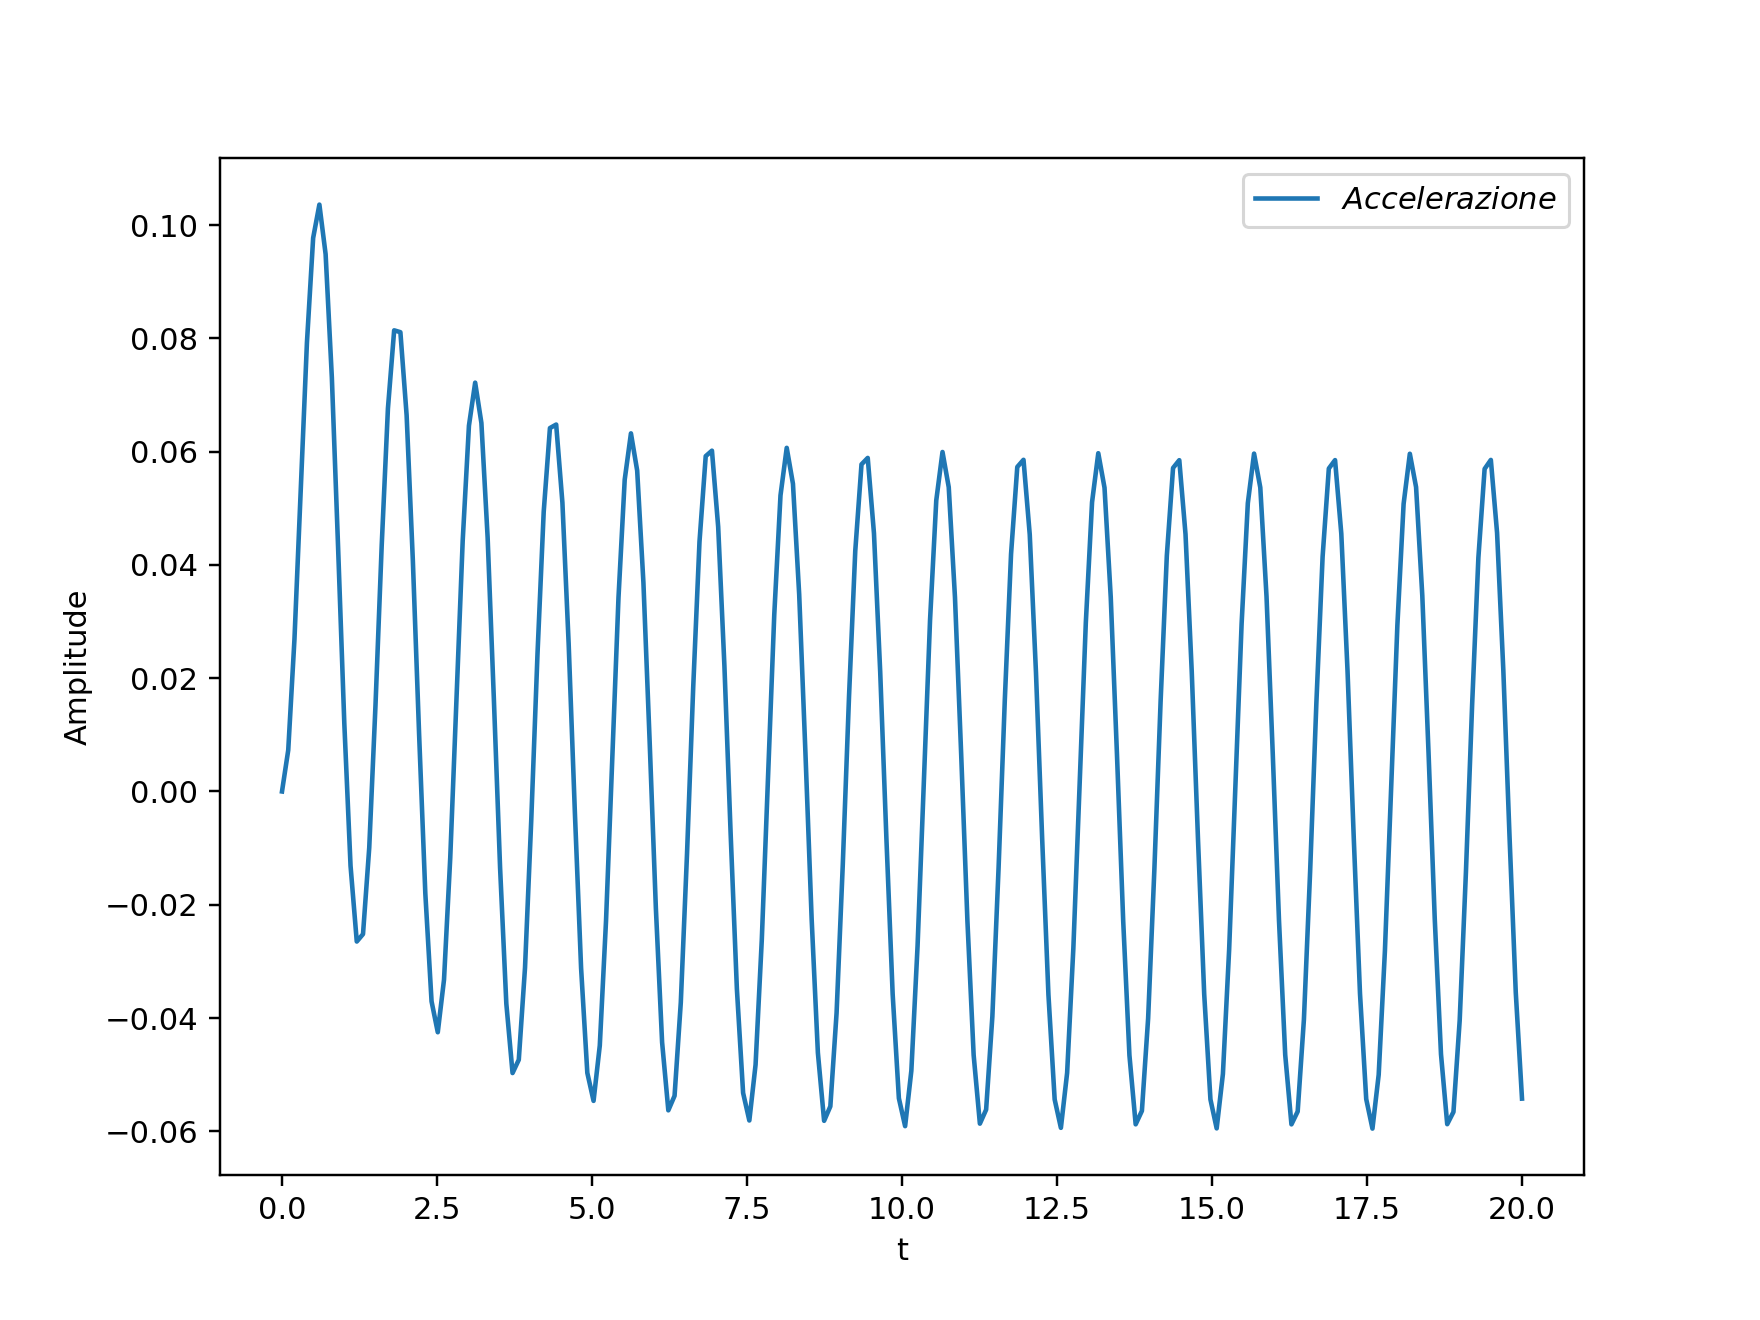

<IPython.core.display.Javascript object>


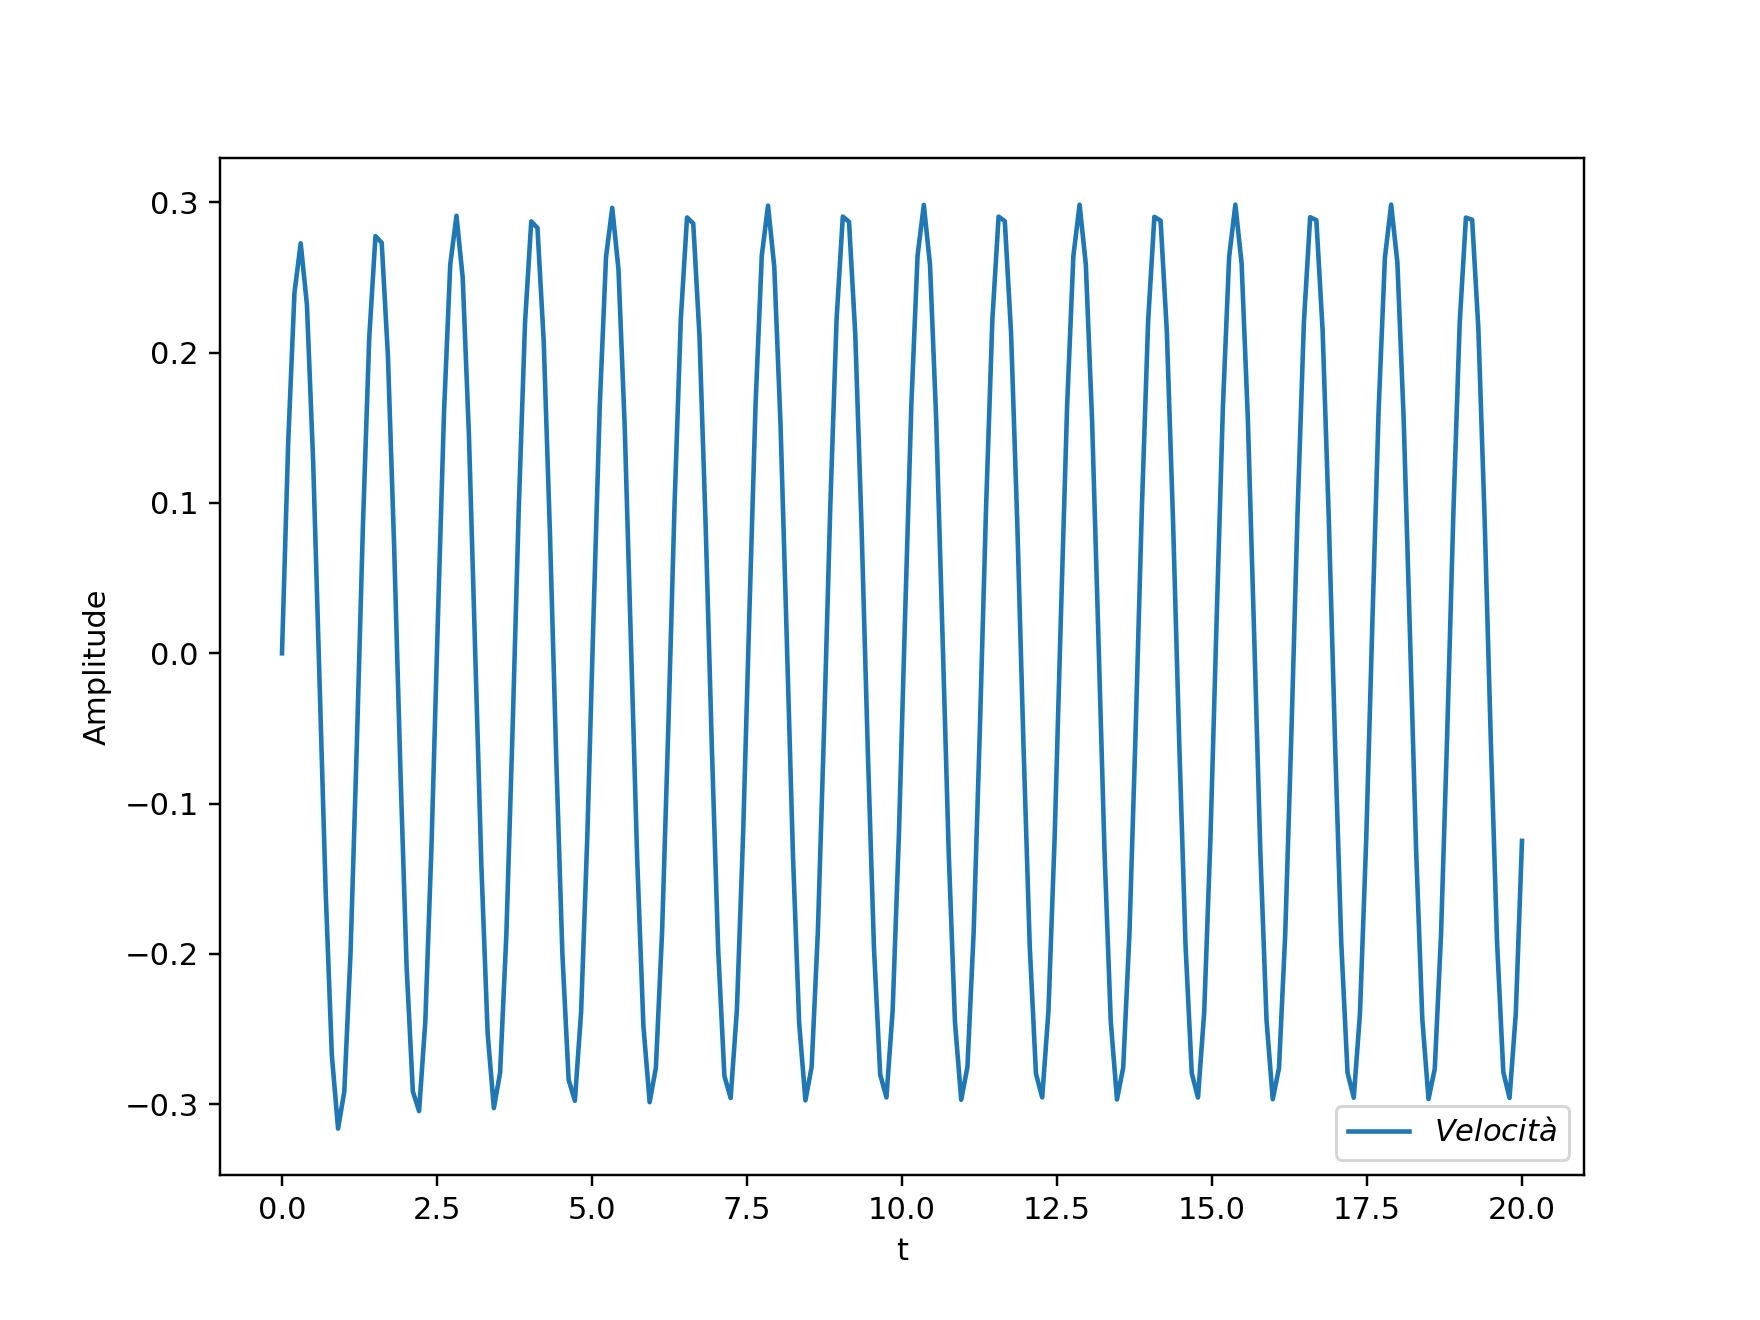

In [2]:
from scipy.integrate import odeint
%matplotlib notebook
Q=2
d=1.5
w=0.65
omega=5

def equations(X, t, Q,d,w,omega):
    return(X[1], -(1/Q)*X[1]+np.sin([0])+d*np.cos(omega*t))

t = np.linspace(0, 20, 200)
Xinit = (0, 0)
X = odeint(equations, Xinit, t, args=(Q,d,w,omega))

#Plot theta
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$Accelerazione$")
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend(loc='best')

#Plot w
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 1], label="$Velocità$")
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend(loc='best')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [3]:
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
from scipy import fftpack
import numpy as np

# Read data from text file into a list of strings
with open('data/populations.txt', 'r') as f:
    data = f.readlines()

data.pop(0)

x=np.linspace(0,1,len(data))
y=[]
y1=[]
for el in data:
    el.split()
    y.append(int(el[1]))
    y1.append(int(el[2]))
    
y1_fft = fftpack.fft(y1)

# Find the frequencies of the components
frequencies = fftpack.fftfreq(len(y1), x[1] - x[0])

# Find the periodicity of the data
periodicity = 1 / abs(frequencies)

print(periodicity)
##########################
y_fft = fftpack.fft(y)

# Find the frequencies of the components
frequencies = fftpack.fftfreq(len(y), x[1] - x[0])

# Find the periodicity of the data
periodicity = 1 / abs(frequencies)
print("")
print(periodicity)

[       inf 1.05       0.525      0.35       0.2625     0.21
 0.175      0.15       0.13125    0.11666667 0.105      0.105
 0.11666667 0.13125    0.15       0.175      0.21       0.2625
 0.35       0.525      1.05      ]

[       inf 1.05       0.525      0.35       0.2625     0.21
 0.175      0.15       0.13125    0.11666667 0.105      0.105
 0.11666667 0.13125    0.15       0.175      0.21       0.2625
 0.35       0.525      1.05      ]


/var/folders/5v/lrjj2scd07924486ywqbnbcm0000gn/T/ipykernel_14590/3755669741.py:25: RuntimeWarning: divide by zero encountered in true_divide
  periodicity = 1 / abs(frequencies)
/var/folders/5v/lrjj2scd07924486ywqbnbcm0000gn/T/ipykernel_14590/3755669741.py:35: RuntimeWarning: divide by zero encountered in true_divide
  periodicity = 1 / abs(frequencies)


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

<IPython.core.display.Javascript object>


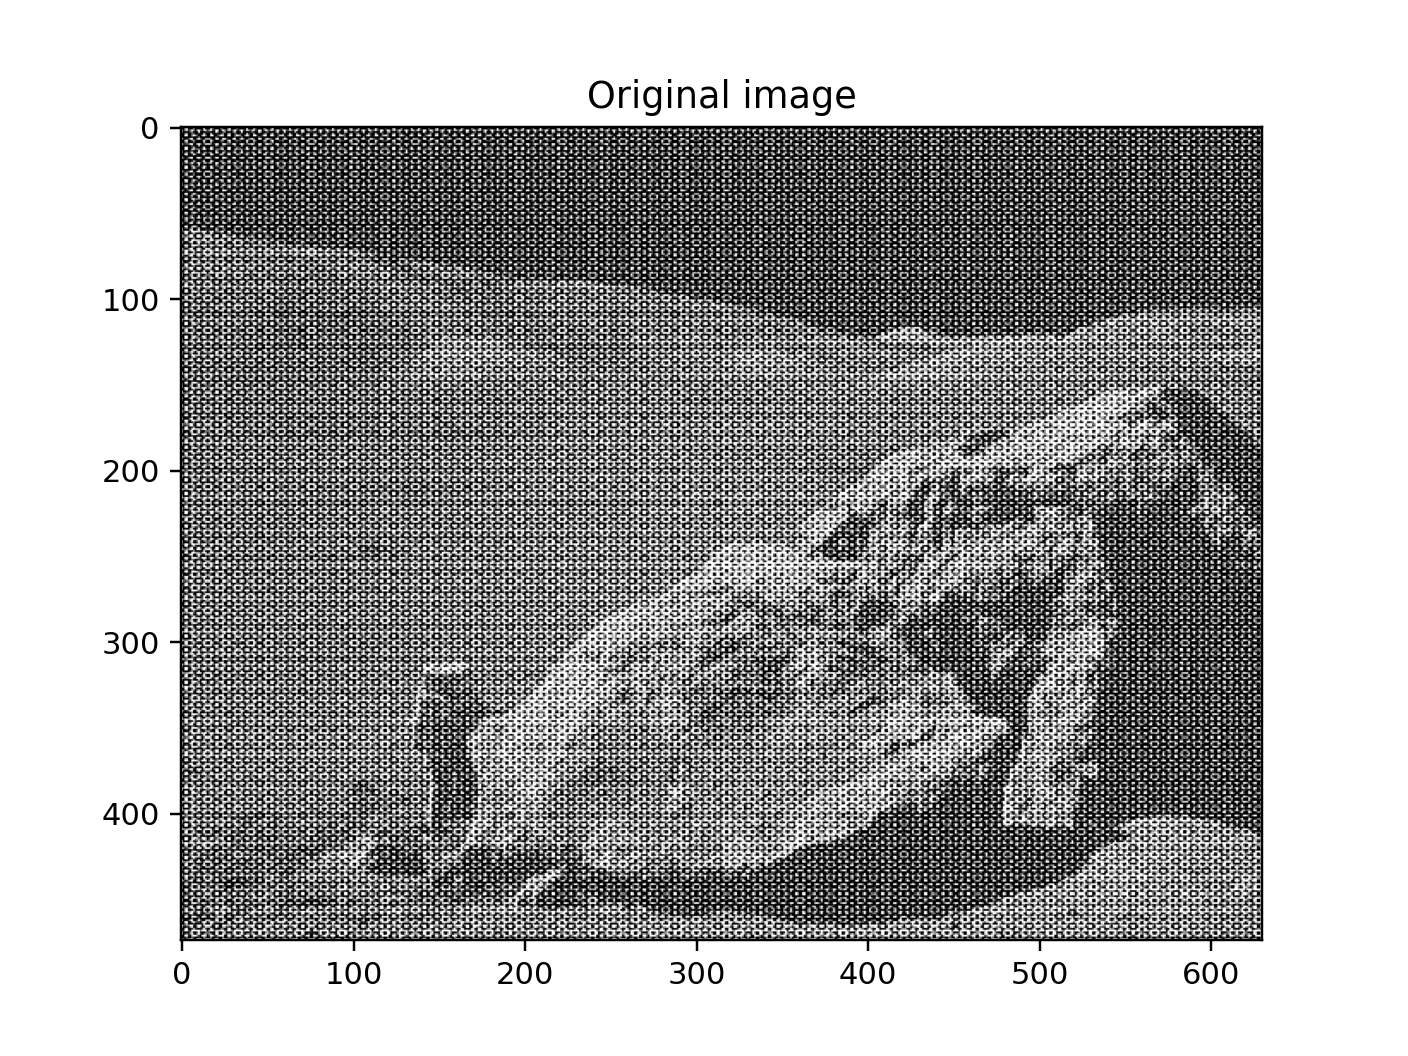

<IPython.core.display.Javascript object>


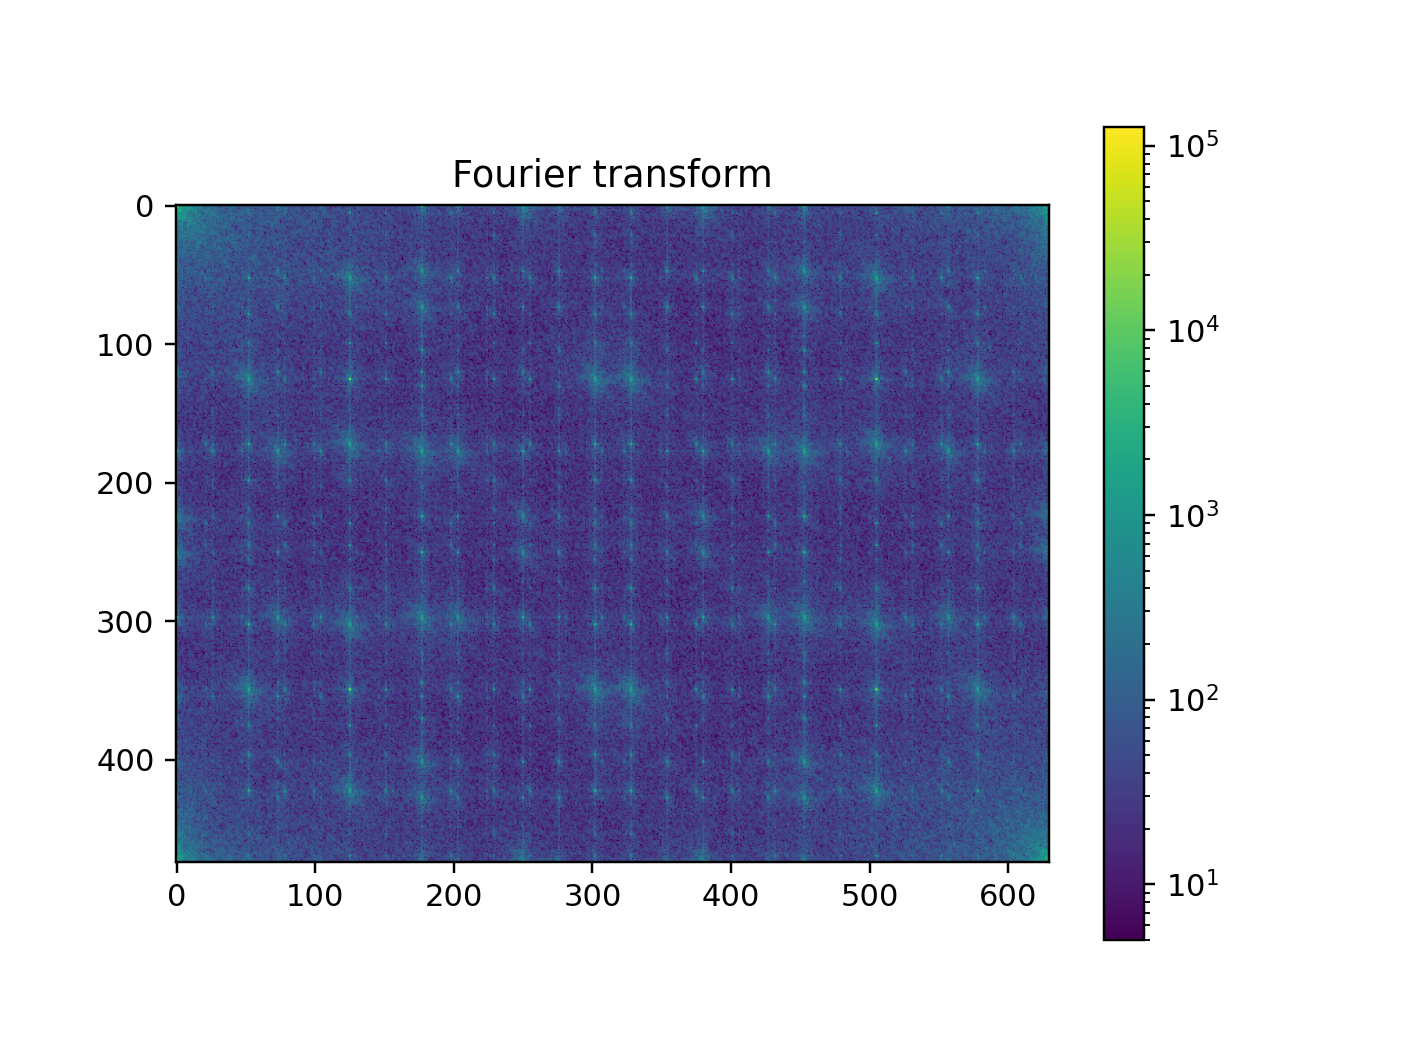

<IPython.core.display.Javascript object>


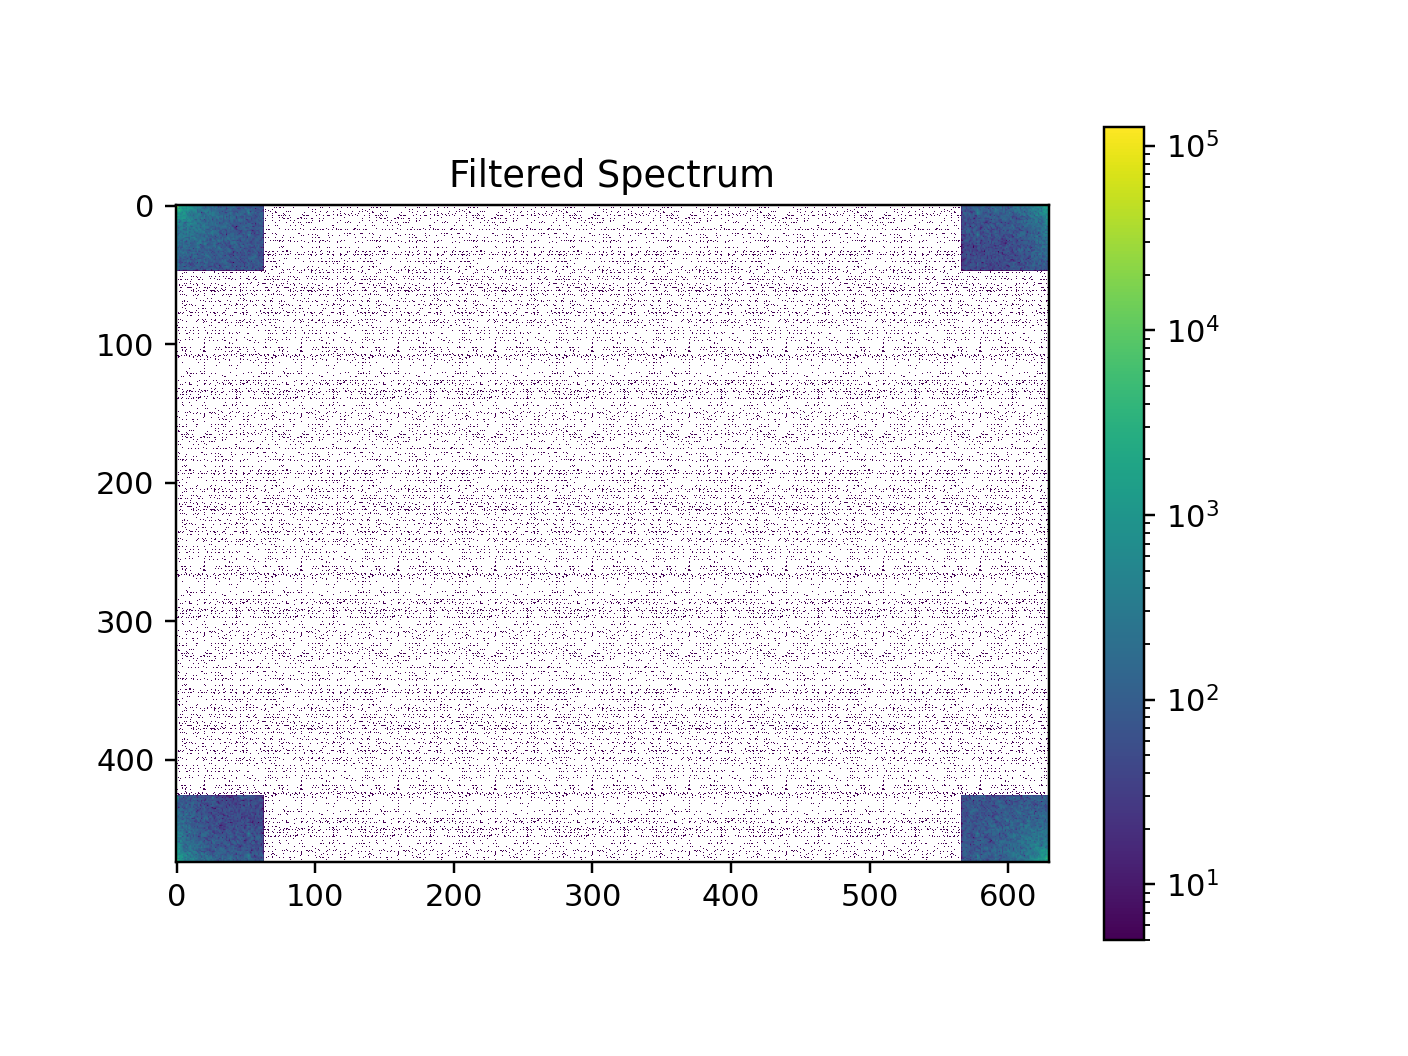

<IPython.core.display.Javascript object>


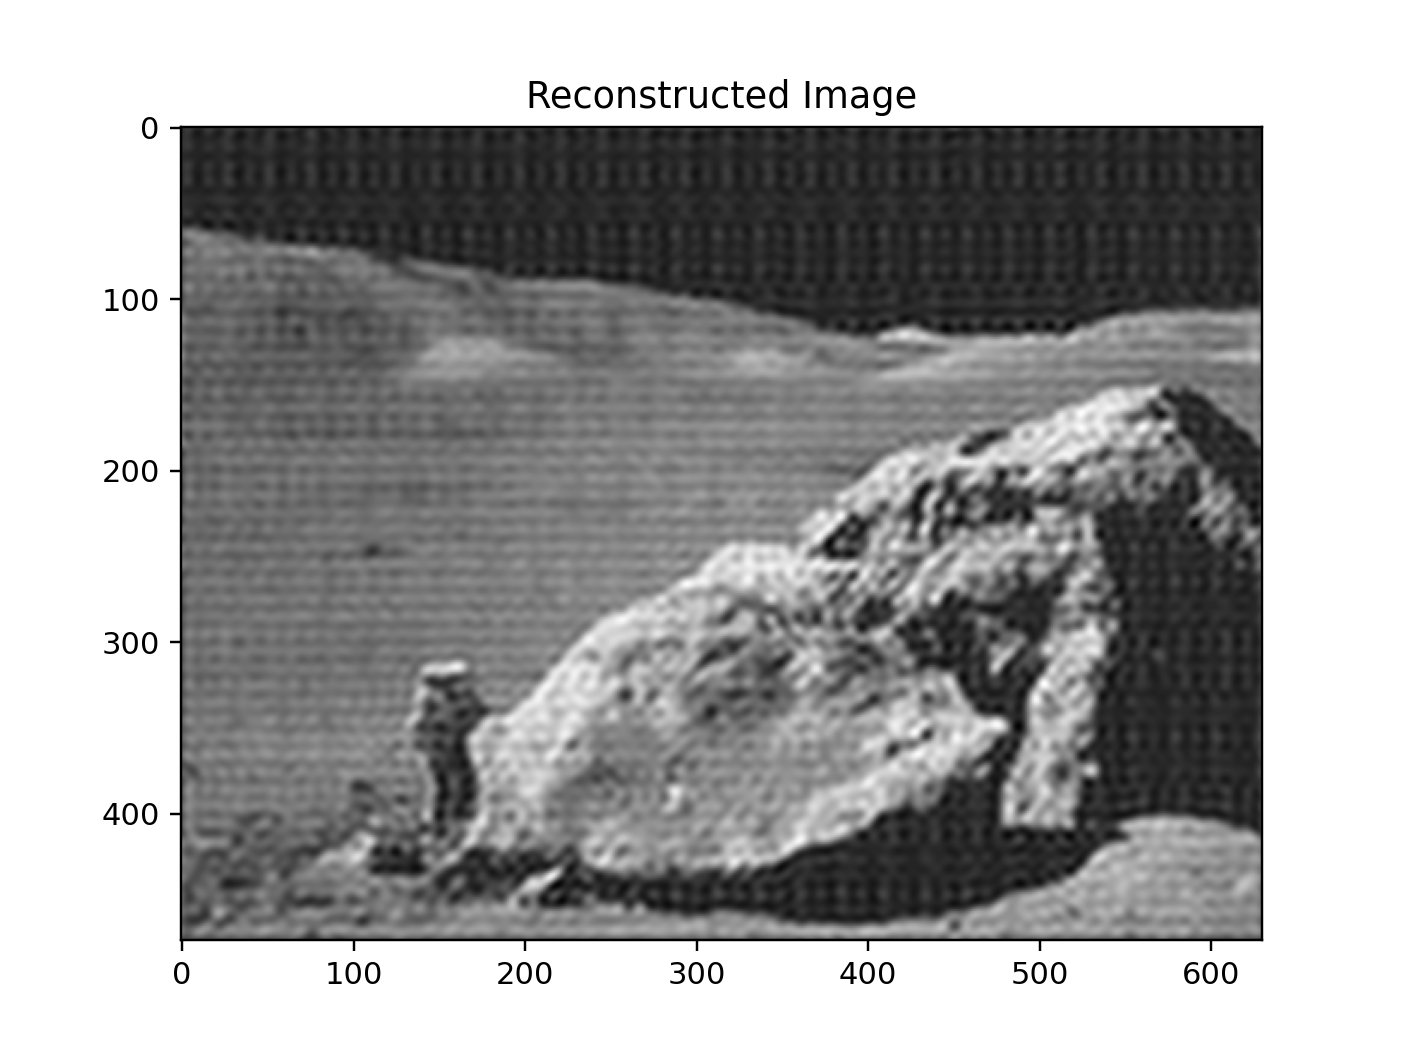

Text(0.5, 1.0, 'Reconstructed Image')

In [4]:
from matplotlib.colors import LogNorm
from scipy import fftpack

im = plt.imread('moonlanding.png').astype(float)
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

im_fft = fftpack.fft2(im)

plt.figure()
plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')

keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape

im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')